In [157]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import slic,mark_boundaries
import argparse
import skimage.color as color
import cv2
from scipy import signal

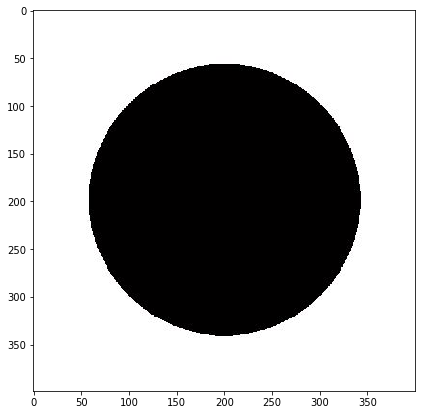

In [201]:
image = io.imread('blackCircle.jpg')
fig = plt.figure(figsize = (7,7))
plt.imshow(image)

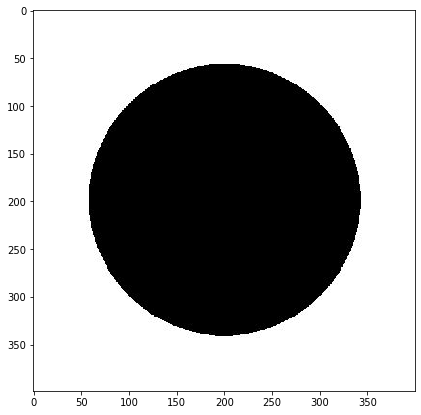

In [202]:
image = color.rgb2gray(image)
fig = plt.figure(figsize = (7,7))
plt.imshow(image, cmap = 'gray')

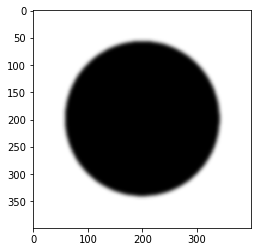

In [320]:
image = cv2.GaussianBlur(image, (7, 7), 3, cv2.BORDER_DEFAULT)
plt.imshow(image, cmap = 'gray')

In [341]:
numberOfDots = 20
theta = np.linspace(0, 2 * np.pi, numberOfDots)
sin = image.shape[1]//2 + 180 * np.sin(theta)
cos = image.shape[0]//1.92-10 + 180 * np.cos(theta)
init = np.array([sin, cos], dtype = 'int').T

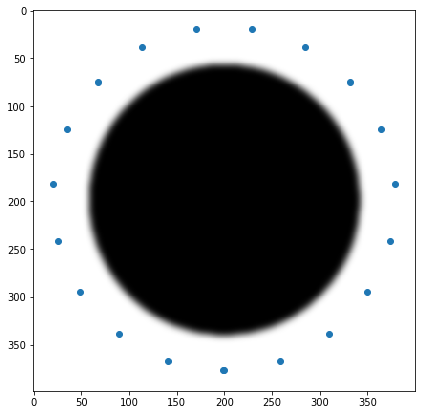

In [342]:
fig = plt.figure(figsize = (7, 7))
plt.imshow(image, cmap = 'gray')
plt.scatter(init[:, 0], init[:, 1])
plt.show()

In [343]:
def gaussian_derivative(x, y, mu, sigma):
    return ((-(x - mu)) / (2 * np.pi * sigma**4)) * np.exp(-(((x - mu)**2 + (y - mu)**2) / (2 * sigma**2)))


def gaussian_derivative_filter(size, sigma, axis):
    mu = size // 2
    mat = np.zeros((size, size))
    if axis == 'x':
        for i in range(size):
            for j in range(size):
                mat[i, j] = gaussian_derivative(j, i, mu, sigma)
    else:
        for i in range(size):
            for j in range(size):
                mat[i, j] = gaussian_derivative(i, j, mu, sigma)

    return mat
def conv(image,kernel):
    return signal.convolve2d(image,kernel,mode='same')

In [344]:
imagex=conv(image,gaussian_derivative_filter(5,1,0))
imagey=conv(image,gaussian_derivative_filter(5,1,1))

In [345]:
def chage(index,array,d,alpha,beta,gama):
    v=array[index,:]
    [x,y]=array[index,:]
    minimum=1e9 
    a,b=0,0
    x,y=int(x),int(y)
    
    for i in range(-1,2):
        for j in range(-1,2):
            vnew=np.array([y+j,x+i])
            if(y+j<image.shape[0] and x+i<image.shape[1]):
                
                E_external=(-(imagex[y+j,x+i]**2+imagey[y+j,x+i]**2)+(imagex[y,x]**2+imagey[y,x]**2))
                
                vnext=array[(index+1)%numberOfDots,:]
                vprev=array[(index-1)%numberOfDots,:]

                
                E_internal_1=((np.linalg.norm(vnew-vnext)-d)**2-(np.linalg.norm(v-vnext)-d)**2)
                E_internal_2=(np.linalg.norm(vnew+vnew-vnext-vprev))**2-(np.linalg.norm(v+v-vnext-vprev))**2

                if(gama*E_external+alpha*E_internal_1+beta*E_internal_2<minimum):
                    minimum=gama*E_external+alpha*E_internal_1+beta*E_internal_2
                    a,b=i,j
    array[index,:]=[x+a,y+b]
    return array

In [346]:
def avrage_d(array):
    s=0
    for index in range(array.shape[0]):
        v=array[index,:]
        v2=array[(index+1)%numberOfDots,:]
        s+=np.linalg.norm(v-v2)
    return s/array.shape[0]

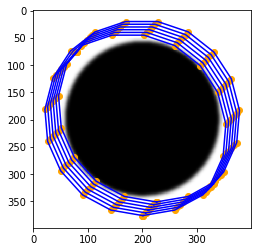

In [347]:
for j in range(30):
    for i in range(numberOfDots):
        init=chage(i,init,avrage_d(init),1,2,5)
    if(j%5==0):
        data=np.zeros((init.shape[0]+1,2))
        data[:init.shape[0],:]=init
        data[init.shape[0],:]=init[0,:]
        plt.imshow(image, cmap = 'gray')
        plt.plot(data[:,0],data[:,1],color='blue')
        plt.scatter(data[:,0],data[:,1],color='orange')

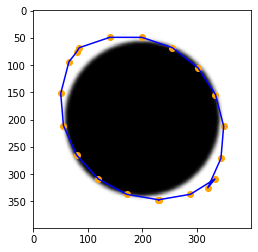

In [339]:
data=np.zeros((init.shape[0]+1,2))
data[:init.shape[0],:]=init
data[init.shape[0],:]=init[0,:]

plt.imshow(image, cmap = 'gray')
plt.plot(data[:,0],data[:,1],color='blue')
plt.scatter(data[:,0],data[:,1],color='orange')
plt.show()